In [1]:
%matplotlib inline

# Auditory oddball

Like the visual P300, we can elicit a P300 with auditory stimuli. The same premise applies: something that is novel or task-related can elicit a posterior positivity. 

In [4]:
# Imports
import os
from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.experiments.auditory_oddball import aMMN_v2 as aMMN

# Some standard pythonic imports
import os, numpy as np, pandas as pd
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils2 import load_data,plot_conditions, check_report
from eegnb.datasets import fetch_dataset

In [5]:
# Define some variables
board_name = "muse2_bfn"
experiment = "auditory_oddball"
subject_id = 0
session_nb = 0
record_duration = 120

In [12]:
eeg_device = EEG(device=board_name, serial_num='Muse-B00E')

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject_id, session_nb)
print(save_fn)

C:\Users\tchan3\.eegnb\data\auditory_oddball\local\muse2_bfn\subject0000\session000\recording_2023-01-10-21.42.46.csv


In [7]:
check_report(eeg_device)



Running signal quality check...
Accepting threshold stdev between: 1 - 18
running check (up to) 60 times, with 5-second windows
will stop after 2 good check results in a row



1/60

Signal quality:
   Fp1: √  (std:   7.1)
   Fp2: √  (std:   8.8)
  TP10: x  (std:  23.2)
   TP9: x  (std: 152.9)
Bad channels: TP10, TP9



2/60

Signal quality:
   Fp1: √  (std:  14.2)
   Fp2: x  (std:  29.1)
  TP10: x  (std: 222.2)
   TP9: x  (std: 287.5)
Bad channels: Fp2, TP10, TP9



3/60

Signal quality:
   Fp1: √  (std:   6.4)
   Fp2: √  (std:   6.7)
  TP10: x  (std:  42.9)
   TP9: x  (std: 150.0)
Bad channels: TP10, TP9



4/60

Signal quality:
   Fp1: x  (std: 243.6)
   Fp2: x  (std: 187.1)
  TP10: x  (std: 321.3)
   TP9: x  (std: 660.6)
Bad channels: Fp1, Fp2, TP10, TP9



5/60

Signal quality:
   Fp1: √  (std:   5.9)
   Fp2: √  (std:   6.4)
  TP10: x  (std: 109.1)
   TP9: x  (std:  83.9)
Bad channels: TP10, TP9


Looks like you still have 2 bad channels after 5 tries




Checks will resume in 5 seconds...Press 'c' (and ENTER key) if you want to stop adjusting for better quality.
 





6/60

Signal quality:
   Fp1: √  (std:   9.7)
   Fp2: √  (std:   7.3)
  TP10: x  (std:  92.0)
   TP9: x  (std:  70.8)
Bad channels: TP10, TP9



7/60

Signal quality:
   Fp1: √  (std:   9.4)
   Fp2: √  (std:   8.6)
  TP10: x  (std:  38.0)
   TP9: x  (std:  40.7)
Bad channels: TP10, TP9



8/60

Signal quality:
   Fp1: √  (std:   5.5)
   Fp2: √  (std:   5.8)
  TP10: x  (std:  24.0)
   TP9: x  (std:  30.1)
Bad channels: TP10, TP9



9/60

Signal quality:
   Fp1: √  (std:   4.6)
   Fp2: √  (std:   5.3)
  TP10: x  (std:  30.9)
   TP9: x  (std:  32.9)
Bad channels: TP10, TP9



10/60

Signal quality:
   Fp1: √  (std:   5.5)
   Fp2: √  (std:   6.0)
  TP10: x  (std:  26.8)
   TP9: x  (std:  27.4)
Bad channels: TP10, TP9


Looks like you still have 2 bad channels after 10 tries




Checks will resume in 5 seconds...Press 'c' (and ENTER key) if you want to stop adjusting for better quality.
 





11/60

Signal quality:
   Fp1: √  (std:  10.4)
   Fp2: √  (std:   7.9)
  TP10: x  (std:  30.7)
   TP9: x  (std:  40.0)
Bad channels: TP10, TP9



12/60

Signal quality:
   Fp1: √  (std:   7.7)
   Fp2: √  (std:   5.5)
  TP10: x  (std:  29.7)
   TP9: x  (std:  30.2)
Bad channels: TP10, TP9



13/60

Signal quality:
   Fp1: √  (std:   5.3)
   Fp2: √  (std:   6.3)
  TP10: x  (std:  24.2)
   TP9: x  (std:  24.1)
Bad channels: TP10, TP9



14/60

Signal quality:
   Fp1: √  (std:   4.7)
   Fp2: √  (std:   5.3)
  TP10: x  (std:  25.4)
   TP9: x  (std:  21.8)
Bad channels: TP10, TP9



15/60

Signal quality:
   Fp1: √  (std:  14.5)
   Fp2: √  (std:   9.9)
  TP10: x  (std:  67.1)
   TP9: x  (std:  65.1)
Bad channels: TP10, TP9


Looks like you still have 2 bad channels after 15 tries




Checks will resume in 5 seconds...Press 'c' (and ENTER key) if you want to stop adjusting for better quality.
 





16/60

Signal quality:
   Fp1: √  (std:  10.1)
   Fp2: √  (std:  12.6)
  TP10: x  (std:  66.3)
   TP9: x  (std:  34.8)
Bad channels: TP10, TP9



17/60

Signal quality:
   Fp1: √  (std:   6.7)
   Fp2: √  (std:   7.1)
  TP10: x  (std:  26.4)
   TP9: x  (std:  20.0)
Bad channels: TP10, TP9



18/60

Signal quality:
   Fp1: √  (std:   5.5)
   Fp2: √  (std:   5.3)
  TP10: √  (std:  15.7)
   TP9: √  (std:  16.8)
No bad channels



19/60

Signal quality:
   Fp1: √  (std:   4.6)
   Fp2: √  (std:   4.6)
  TP10: √  (std:  15.8)
   TP9: √  (std:  14.5)
No bad channels



All good! You can proceed on to data collection :) 


In [13]:
aMMN.present(duration=record_duration, eeg=eeg_device, save_fn=save_fn)

324
6907.1621 	WARNING 	User requested fullscreen with size [1920 1080], but screen is actually [2048, 1152]. Using actual size
6908.4950 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
6913.5136 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [2048, 1152]. Using actual size


In [14]:
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')    

# to load data from a specific subject and session:
subject = 0
session = 0
# make sure that these numbers are correct, or it will run from the last time you used 'subject' and 'session', 
# including from above!

raw = load_data(subject,session,
                experiment='auditory_oddball', site='local', device_name='muse2_bfn',
                data_dir = eegnb_data_path)

['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=91840
    Range : 0 ... 91839 =      0.000 ...   358.746 secs
Ready.
['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
['TP9', 'Fp1', 'Fp2', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=31396
    Range : 0 ... 31395 =      0.000 ...   122.637 secs
Ready.


In [15]:
raw.filter(1,20, method='iir')
# raw.plot_psd(fmin=1, fmax=30); # visualize power spectrum after filtering

# Create an array containing the timestamps and type of each stimulus (target/non-target)
events = find_events(raw)
event_id = {'Non-Target': 1, 'Target': 2}

# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 20.00 Hz: -6.02, -6.02 dB

478 events found
Event IDs: [1 2]
sample drop %:  23.43096234309623


Number of events,366
Events,Non-Target: 311Target: 55
Time range,-0.102 – 0.801 sec
Baseline,off


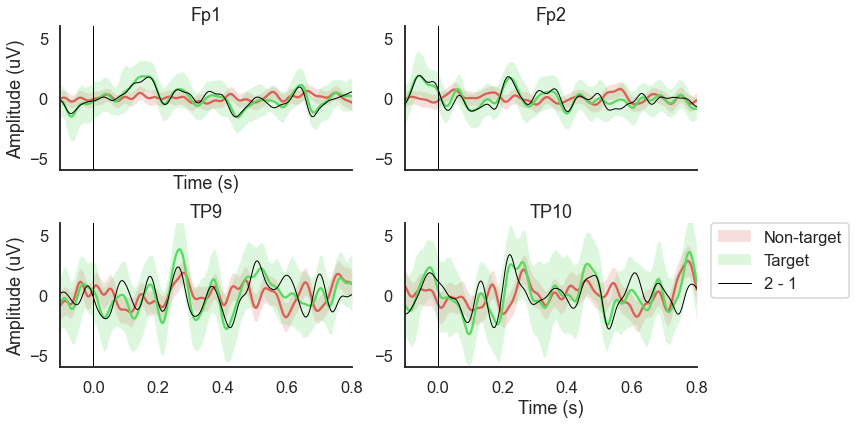

In [16]:
conditions = OrderedDict()
conditions['Non-target'] = [1]
conditions['Target'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions, 
                          ci=97.5, n_boot=1000, title='',
                          diff_waveform=(1, 2),
                          channel_order=[1, 0, 2, 3])